#Apriori Algorithm


In [1]:
#install MLXTEND package
!pip install mlxtend


In [2]:
#verify installation
import mlxtend
print(mlxtend.__version__)


0.23.4


In [10]:
# TransactionID is just a unique number for each transaction.
# It helps track and distinguish one transaction from another.
# Here, it goes from 1 to 5 because there are 5 separate transactions.
# Items: this lists the products bought in each transaction.
# Each row represents what items were bought together in one purchase.
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

dataset = {
    'TransactionID': [1, 2, 3, 4, 5],
    'Items': [['bread', 'milk', 'eggs'],
              ['bread', 'butter', 'milk'],
              ['bread', 'milk', 'eggs'],
              ['bread', 'butter', 'milk'],
              ['bread', 'milk', 'eggs', 'butter']]
}

df = pd.DataFrame(dataset)
print("Dataset itself alone: ")
print(df)
print("\n")

# It will just take teh dataframe and put it into different order
# if something was included in the first transaction, it will have a True value in that field
# And if that was not included in one field, it will have value False
basket_sets= pd.get_dummies(df["Items"].apply(pd.Series).stack()).groupby(level=0).sum().astype(bool)
print("Basket sets")
print(basket_sets)
print("\n")


frequent_itemsets = apriori(basket_sets, min_support=0.4, use_colnames=True)
# min_support=0.4, meaning items must appear in at least 40% of transactions to be considered frequent.
# support is calculated as number of transactions with tha one item over total number of transactions.
# The Apriori algorithm starts with single items, finds frequent ones, and combines them to form larger sets.
# It eliminates itemsets whose support is below 0.4 (40%).
# If an itemset is frequent, it checks its subsets and super sets.
# If the iteme is not frequent, neither it or its combinations will be checked.
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\n")

Dataset itself alone: 
   TransactionID                        Items
0              1          [bread, milk, eggs]
1              2        [bread, butter, milk]
2              3          [bread, milk, eggs]
3              4        [bread, butter, milk]
4              5  [bread, milk, eggs, butter]


Basket sets
   bread  butter   eggs  milk
0   True   False   True  True
1   True    True  False  True
2   True   False   True  True
3   True    True  False  True
4   True    True   True  True


Frequent Itemsets:
   support       itemsets
0      1.0        (bread)
1      1.0         (milk)
2      1.0  (bread, milk)




#SEQUENTIAL PATTERN MINING


In [9]:
!pip install pymining

In [18]:
from pymining import seqmining


sequences = [
    ['a', 'b', 'c', 'd'],
    ['b', 'c', 'd'],
    ['a', 'c', 'e'],
    ['a', 'f'],
    ['b', 'c', 'e']
]

freq_seqs = seqmining.freq_seq_enum(sequences, 2) #2 is the smallest number of frequenices

# seqmining.freq_seq_enum() → Finds frequent sequential patterns in the dataset.
# sequences: The dataset (list of sequences).
# 2: Minimum length of the pattern. Only patterns with 2 or more items will be shown.

for pattern in freq_seqs:
    print("Pattern:", pattern)

# The algorithm used here is similar to the SPADE (Sequential Pattern Discovery using Equivalence classes) algorithm, following a PrefixSpan-like approach:
# Prefix-Based Search:
# It finds common prefixes in the sequences.
# Example: If "b" is common, it looks for what follows after "b".
# Pattern Growth:
# It extends patterns recursively, like:
# From 'b' → to 'b', 'c' → to 'b', 'c', 'd'
# Pruning:
# Patterns that don’t meet the min length (2) or frequency threshold are discarded.

#In cas eyou want to filter by length
# Filter out single-character patterns (length > 1)
for pattern in freq_seqs:
  if (len(pattern[0]) > 1):
    print(pattern)


Pattern: (('a',), 3)
Pattern: (('a', 'c'), 2)
Pattern: (('b', 'c'), 3)
Pattern: (('e',), 2)
Pattern: (('b',), 3)
Pattern: (('c', 'e'), 2)
Pattern: (('c', 'd'), 2)
Pattern: (('b', 'd'), 2)
Pattern: (('b', 'c', 'd'), 2)
Pattern: (('c',), 4)
Pattern: (('d',), 2)
(('a', 'c'), 2)
(('b', 'c'), 3)
(('c', 'e'), 2)
(('c', 'd'), 2)
(('b', 'd'), 2)
(('b', 'c', 'd'), 2)


#SPATIAL PATTERN MINING


[ 0  0  0  1  1  1  2  2  2 -1  0 -1]
Number of clusters: 3


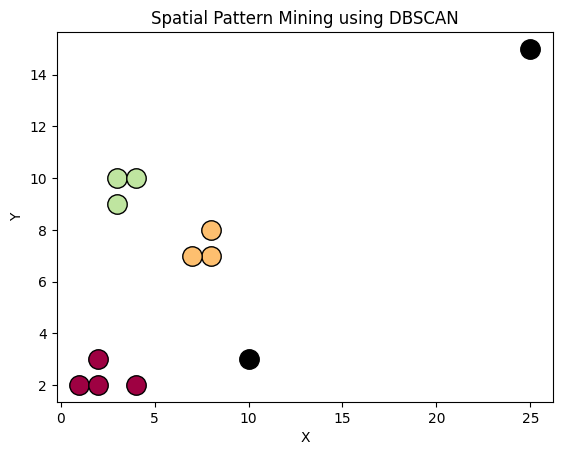

'\neps parameter: the maximum distance between two samples for one to be considered as in the neighborhood of the other\nmin_samples: the number of samples in a neighborhood for a point to be considered as a core point.\n'

In [22]:
#Spatial pattern mining using DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

#[x, y] represents a point in space.
X = np.array([
    [1, 2], [2, 3], [2, 2],
    [8, 7], [8, 8], [7, 7],
    [3, 10], [4, 10], [3, 9],
    [25, 15], [4, 2], [10, 3] #outliers
])

#DBSCAN() creates the clustering model.
# eps=2: Maximum distance between two points to be considered neighbors.
# min_samples=2: Minimum points required to form a dense region (cluster).
# .fit(X) runs the DBSCAN algorithm on the dataset X.

db = DBSCAN(eps=2, min_samples=2).fit(X)

# labels assigns each point to a cluster.
# Cluster IDs:
# 0, 1, 2, ... → These are the cluster numbers.
# -1: Represents noise (outliers).
labels = db.labels_
print(labels)

# Number of clusters, ignoring noise if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters:", n_clusters)

# Plot clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('Spatial Pattern Mining using DBSCAN')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

'''
eps parameter: the maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples: the number of samples in a neighborhood for a point to be considered as a core point.
'''

#Graph Pattern Mining

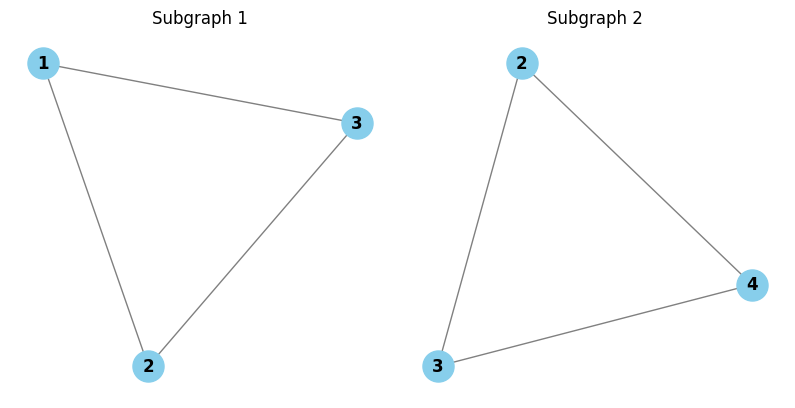

In [25]:
#Graph pattern mining
import networkx as nx
import matplotlib.pyplot as plt

# Creates an empty graph object G.
# A graph in NetworkX consists of nodes and edges.
#1,2 does not mean x and y coordinates rather 1 is connected to 2, and etc.
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)])

# A clique is a group of nodes in a graph where every node connects to every other node.
# In simple words, it’s a fully connected subgraph.
# The smallest clique is a triangle (3 nodes, fully connected).
subgraphs = [subgraph for subgraph in nx.enumerate_all_cliques(G) if len(subgraph) == 3]

#function enumerate all cliques would return all cliques when dots one by one are connected
#then, when two dots are connected together
#and then when three dots are connected together
# Size 1: [1], [2], [3], [4], [5]
# Size 2: [1, 2], [1, 3], [2, 3], [2, 4], [3, 4], [4, 5]
# Size 3: [1, 2, 3], [2, 3, 4]
#and we will filter only three size clique

#enumerate(subgraphs) generates both:
# i: The index (0, 1, 2, ...)
# subgraph: Each 3-node clique (like [1, 2, 3] or [2, 3, 4]).
# i = 0, subgraph = [1, 2, 3]
# i = 1, subgraph = [2, 3, 4]

# plt.subplot(2, 3, i + 1) creates a grid of plots with:
# 2 rows
# 3 columns
# i + 1 sets the plot position for each subgraph.
# Example:
# i = 0 → plt.subplot(2, 3, 1) → First plot (top left).
# i = 1 → plt.subplot(2, 3, 2) → Second plot (next to it).

# tight_layout automatically adjusts the plot’s spacing.
# Without it, plots might overlap.
# It ensures each subplot fits nicely without cutting off labels.
plt.figure(figsize=(12, 8))
for i, subgraph in enumerate(subgraphs):
    plt.subplot(2, 3, i + 1)
    subgraph_G = G.subgraph(subgraph)
    nx.draw(subgraph_G, with_labels=True, font_weight='bold', node_color='skyblue', node_size=500, edge_color='gray')
    plt.title(f"Subgraph {i+1}")

plt.tight_layout()
plt.show()

#TIME SERIES PATTERN MINING

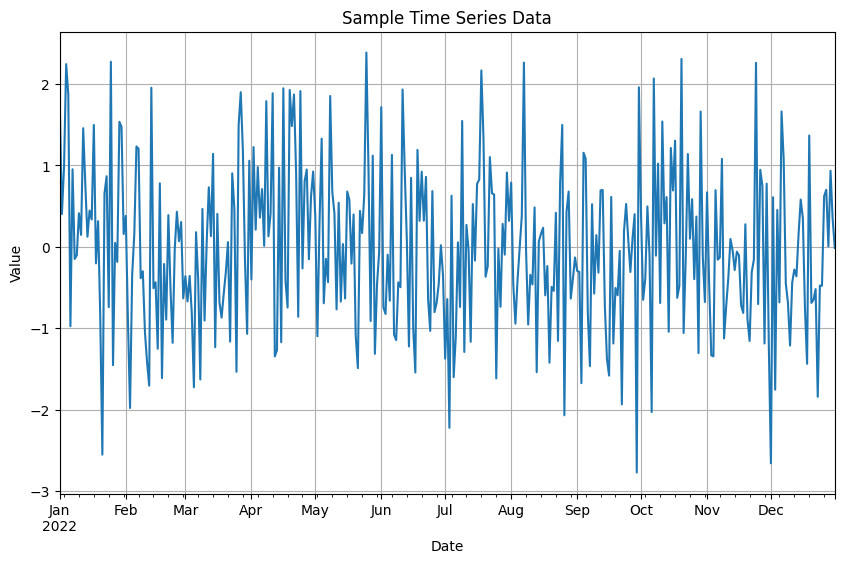

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
#seed 0 means that value will be same everytime

date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
# pd.date_range: Creates a range of dates from '2022-01-01' to '2022-12-31'.
# freq='D' means daily frequency (one date per day).
# This gives 365 dates (one for each day of 2022).

data = np.random.randn(len(date_range))
# np.random.randn(n) generates n random numbers from a normal distribution (mean=0, std=1).
# len(date_range) returns 365, so you get 365 random values.
ts = pd.Series(data, index=date_range)

plt.figure(figsize=(10, 6))
ts.plot()
plt.title('Sample Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

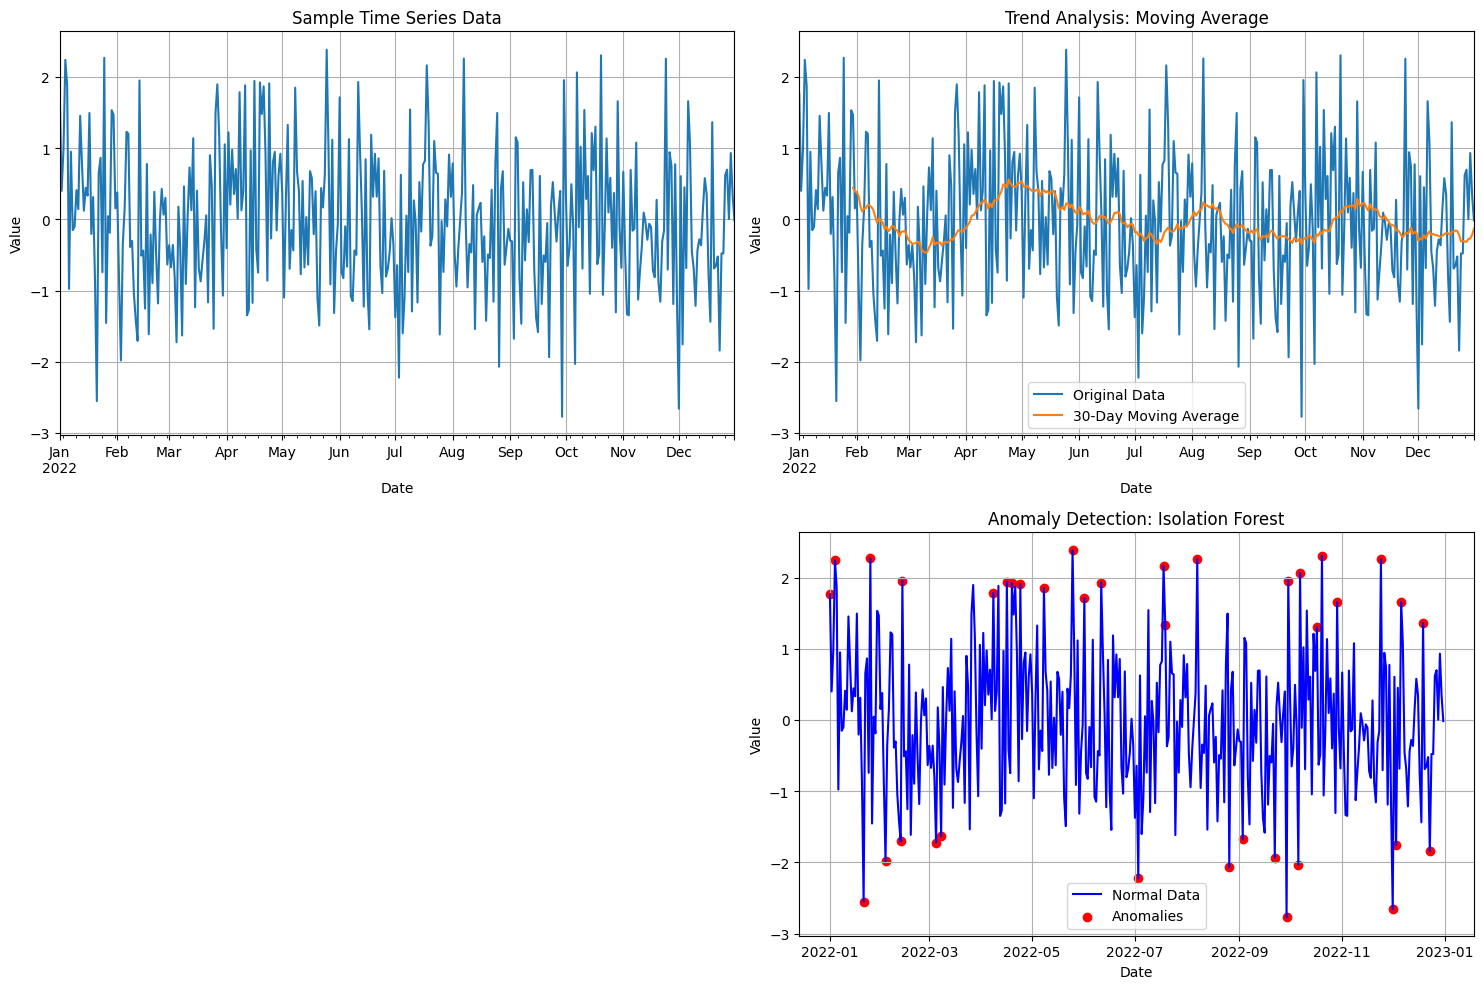

In [28]:
#Time series pattern mining
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


# Generate sample time series data
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = np.random.randn(len(date_range))
ts = pd.Series(data, index=date_range)

# Plot the time series data
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
ts.plot()
plt.title('Sample Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

# Trend Analysis: Moving Average
# plt.subplot(nrows, ncols, index)
# Arguments:
# nrows: Number of rows in the plot grid.
# ncols: Number of columns in the plot grid.
# index: The position of the current plot (1-based, left-to-right, top-to-bottom).
# plt.subplot(2, 2, 3)
# 2 (nrows): 2 rows of plots.
# 2 (ncols): 2 columns of plots.
# 1, 2, 3, 4 (index):
# 1: First plot (top-left).
# 2: Second plot (top-right).
# 3: Third plot (bottom-left).
# 4: Fourth plot (bottom-right).


plt.subplot(2, 2, 2)
rolling_mean = ts.rolling(window=30).mean()  # 30-day moving average, For each day, it takes the average of the last 30 days' values.
ts.plot(label='Original Data')
rolling_mean.plot(label='30-Day Moving Average')
plt.title('Trend Analysis: Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)


# Anomaly Detection: Isolation Forest

# Isolation Forest is an anomaly detection algorithm.
# contamination=0.1: It assumes 10% of the data points are anomalies.

# Fits the model to the time series data.
# Output:
# +1 → Normal point
# -1 → Anomalous point


plt.subplot(2, 2, 4)
model = IsolationForest(contamination=0.1)
anomalies = model.fit_predict(ts.values.reshape(-1, 1))

plt.plot(ts.index, ts, label='Normal Data', color='blue')
plt.scatter(ts.index[anomalies == -1], ts[anomalies == -1], label='Anomalies', color='red')
plt.title('Anomaly Detection: Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#TASKS


1. Find frequently bought fruit combinations from a grocery store's sales data.

In [30]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Define the dataset (Transactions of fruits)
dataset = {
    'TransactionID': [1, 2, 3, 4, 5, 6],
    'Items': [['apple', 'banana', 'grapes'],
              ['apple', 'orange', 'banana'],
              ['apple', 'banana'],
              ['banana', 'grapes'],
              ['apple', 'orange'],
              ['orange', 'grapes']]
}

# Convert dataset into DataFrame
df = pd.DataFrame(dataset)

# One-hot encoding the items
basket_sets = pd.get_dummies(df['Items'].apply(pd.Series).stack()).groupby(level=0).sum().astype(bool)

# Apply Apriori algorithm with minimum support of 40%
frequent_itemsets = apriori(basket_sets, min_support=0.4, use_colnames=True)

# Display results
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
    support         itemsets
0  0.666667          (apple)
1  0.666667         (banana)
2  0.500000         (grapes)
3  0.500000         (orange)
4  0.500000  (banana, apple)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0    (banana)     (apple)            0.666667            0.666667      0.5   
1     (apple)    (banana)            0.666667            0.666667      0.5   

   confidence   lift  representativity  leverage  conviction  zhangs_metric  \
0        0.75  1.125               1.0  0.055556    1.333333       0.333333   
1        0.75  1.125               1.0  0.055556    1.333333       0.333333   

   jaccard  certainty  kulczynski  
0      0.6       0.25        0.75  
1      0.6       0.25        0.75  


2. Find common page navigation patterns from website user sessions (Customer Website Clickstream)

In [31]:
from pymining import seqmining

# Define user clickstream sequences (Page visits)
sequences = [
    ['home', 'products', 'checkout'],
    ['home', 'products', 'cart'],
    ['home', 'cart'],
    ['home', 'products', 'checkout'],
    ['home', 'about', 'products'],
    ['products', 'checkout']
]

# Find frequent sequential patterns (min count = 2)
freq_seqs = seqmining.freq_seq_enum(sequences, 2)

# Display results
print("Frequent Sequential Patterns:")
for pattern in freq_seqs:
    print("Pattern:", pattern)


Frequent Sequential Patterns:
Pattern: (('home', 'checkout'), 2)
Pattern: (('home', 'cart'), 2)
Pattern: (('products', 'checkout'), 3)
Pattern: (('products',), 5)
Pattern: (('checkout',), 3)
Pattern: (('cart',), 2)
Pattern: (('home', 'products'), 4)
Pattern: (('home', 'products', 'checkout'), 2)
Pattern: (('home',), 5)


3. Cluster store locations based on geographical coordinates (DBSCAN - Store Locations Clustering)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Store locations (latitude, longitude)
locations = np.array([
    [40.7128, -74.0060], [40.7138, -74.0070], [40.7148, -74.0050],  # NYC cluster
    [34.0522, -118.2437], [34.0510, -118.2440],                     # LA cluster
    [41.8781, -87.6298], [41.8790, -87.6300],                       # Chicago cluster
    [37.7749, -122.4194]                                            # SF (isolated)
])

# Apply DBSCAN clustering
db = DBSCAN(eps=0.01, min_samples=2).fit(locations)
labels = db.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = locations[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=100, edgecolor='k', label=f'Cluster {k}')

plt.title('Store Location Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid(True)
plt.show()


4. Find friend circles (cliques) in a social network graph. (Network of Friendships)

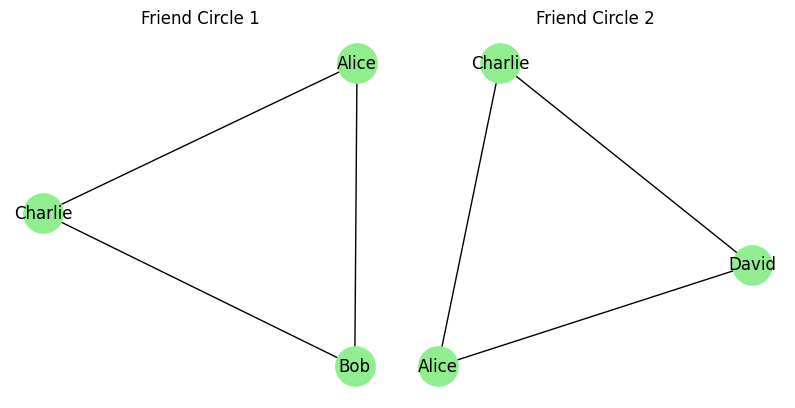

Friend Circles (3-node cliques):
['Alice', 'Bob', 'Charlie']
['Alice', 'Charlie', 'David']


In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph representing friendships
G = nx.Graph()
G.add_edges_from([
    ('Alice', 'Bob'), ('Alice', 'Charlie'), ('Bob', 'Charlie'),
    ('Charlie', 'David'), ('David', 'Eve'), ('Eve', 'Frank'),
    ('Alice', 'David'), ('Bob', 'Eve')
])

# Find cliques of size 3 (friend circles)
cliques = [clique for clique in nx.enumerate_all_cliques(G) if len(clique) == 3]

# Plot each clique
plt.figure(figsize=(12, 8))
for i, clique in enumerate(cliques):
    plt.subplot(2, 3, i + 1)
    subgraph = G.subgraph(clique)
    nx.draw(subgraph, with_labels=True, node_color='lightgreen', node_size=800)
    plt.title(f"Friend Circle {i+1}")

plt.tight_layout()
plt.show()

# Display cliques
print("Friend Circles (3-node cliques):")
for clique in cliques:
    print(clique)
